# Credit Card Fraud Detection - Data Visualization

This is the first post for [Credit Card Fraud Detection](https://www.kaggle.com/dalpozz/creditcardfraud). The goal of this project is to explore different classification models and evaluate their performance for an imbalanced dataset. Along with implementing classification models, I also wanted to explore some the methods used to handle class imbalance.
In this post, I mainly explore the dataset using visualization tools.

We hear/read about credit card frauds and identity theft every other day. Recently, I received a call from a fraudster. Unaware, I was almost duped. Thankfully, I realized something is awfully wrong with the voice and the tone of the caller. Plus, he asked me to pay my 'fines' using Walmart gift cards. Really?! I managed to escape this but not without divulging some information about me. What if he uses that information to hack into my back accounts? He would've committed credit card fraud maybe by using my card information on online shopping websites. 

Credit card frauds can be unnoticeable to the human eye. It is easy to pretend some one while using the card. In my experience, only at shopping centres has my ID been checked with my credit card. Everywhere else I could be anyone but the cardholder. All of the online websites I have used requires me to just enter my card information and zip code (how easy is that once you have the card information) instead of two-step verification (like a verification code through a text message). I might be missing something here in terms of online card transaction security and any information on this would be great. My point being, it's not that difficult to get someone else's card information and use it for different purposes. So, how do banks and credit card companies keep us safe in terms of credit card frauds? It's by using historical data of all the transactions! Fraudulent transactions may have a pattern - card is used in different locations, huge withdrawals and transactions in small amounts to avoid suspicion are just some of the indications. 

I came across Kaggle's dataset on [Credit Card Fraud Detection](https://www.kaggle.com/dalpozz/creditcardfraud) and decided to dive into this problem. This dataset includes transactions by European cardholders completed in September 2013. I want to explore some of the classification methods that could be used to solve this problem. The biggest challenge of this problem is the class imbalance - only 0.172% of all transactions in this dataset are fraudulent. This post explores the dataset using data visualization.
<!--TEASER_END-->

In [1]:
import os
os.chdir('D:/ML_Projects/CreditCardFraud/') #Set working directory
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns
import matplotlib.ticker as ticker
import itertools
import datetime
from collections import Counter

from imblearn.over_sampling import RandomOverSampler, SMOTE

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

sns.set_style('whitegrid')

%matplotlib inline

## Data Description

1. The datasets contains transactions made by credit cards in September 2013 by european cardholders. The transactions occur in two days.
2. Features V1, V2, ... V28 are the principal components obtained with PCA.
3. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
4. The feature 'Amount' is the transaction Amount.
5. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Read and Explore the data set

In [2]:
# Read credit card fraud data
cc_fraud = pd.read_csv('./Data/creditcard.csv')
print("Number of instances: %d" % cc_fraud.shape[0])
print("Number of features: %d" % cc_fraud.shape[1])
cc_fraud.head()

Number of instances: 284807
Number of features: 31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
cc_fraud.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Any missing values?

In [4]:
# Missing values
na_perc = {}
for col in cc_fraud.columns:
    na_perc[col] = cc_fraud[col].isnull().sum()*100/len(cc_fraud)
na_perc

{'Amount': 0.0,
 'Class': 0.0,
 'Time': 0.0,
 'V1': 0.0,
 'V10': 0.0,
 'V11': 0.0,
 'V12': 0.0,
 'V13': 0.0,
 'V14': 0.0,
 'V15': 0.0,
 'V16': 0.0,
 'V17': 0.0,
 'V18': 0.0,
 'V19': 0.0,
 'V2': 0.0,
 'V20': 0.0,
 'V21': 0.0,
 'V22': 0.0,
 'V23': 0.0,
 'V24': 0.0,
 'V25': 0.0,
 'V26': 0.0,
 'V27': 0.0,
 'V28': 0.0,
 'V3': 0.0,
 'V4': 0.0,
 'V5': 0.0,
 'V6': 0.0,
 'V7': 0.0,
 'V8': 0.0,
 'V9': 0.0}

### What is the linear correlation between the features?

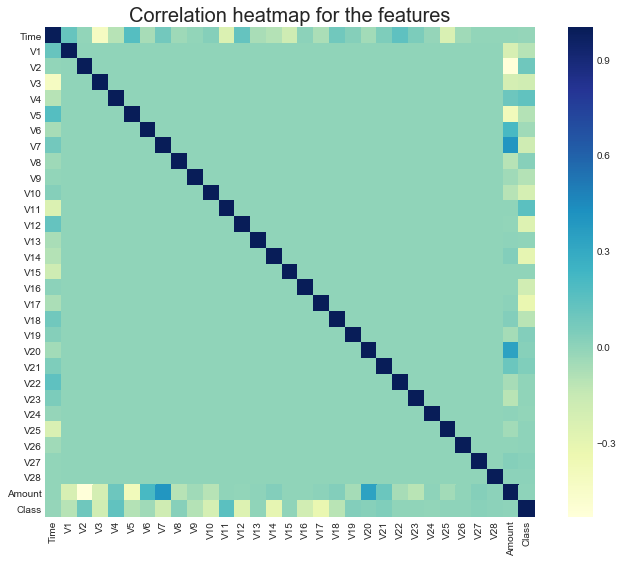

In [5]:
# Feature correlations - ideally should be uncorrelated since they are different components from PCA
corrmat = cc_fraud.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, square = True, cmap = 'YlGnBu')
plt.title('Correlation heatmap for the features', fontsize=20)

Linear correlation between PCA features in close to 0.

### What is the distribution of the class variable?

You would expect that the number of credit cards would significantly lower than legitimate transactions. Let's find out whether the world is filled good people or fraudsters.

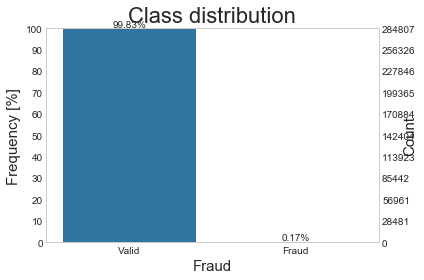

In [6]:
# Class distribution
map_dict = {0:"Valid", 1:"Fraud"}
cc_fraud['Class'] = cc_fraud['Class'].map(map_dict)
ncount = len(cc_fraud)

plt.figure()
sns.set_context({"figure.figsize": (10, 8)})
g = sns.countplot(x = 'Class', data = cc_fraud)
#g.set_xticklabels(labels,rotation = 90)
plt.title("Class distribution", fontsize=22)
g.set_xlabel('Fraud', fontsize=15)
g.set_ylabel('Frequency [%]', fontsize=15, labelpad=25)
g.axes.grid('off')

g2 = g.twinx()
g2.yaxis.tick_left()
g.yaxis.tick_right()

for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

g.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
g2.set_ylim(0,100)
g.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
g2.yaxis.set_major_locator(ticker.MultipleLocator(10))
g2.set_ylabel('Count', fontsize=15, labelpad=25)
g2.axes.grid('off')
plt.tight_layout()

Phew! The world is still good.

### Distribution of transaction amount by transaction class

Do fraudsters do multiple transactions of small amounts or are they foolish enough to spend a high amount in one transaction? Let's find out!

(array([  1.00000000e-02,   1.00000000e-01,   1.00000000e+00,
          1.00000000e+01,   1.00000000e+02,   1.00000000e+03,
          1.00000000e+04,   1.00000000e+05,   1.00000000e+06]),
 <a list of 9 Text yticklabel objects>)

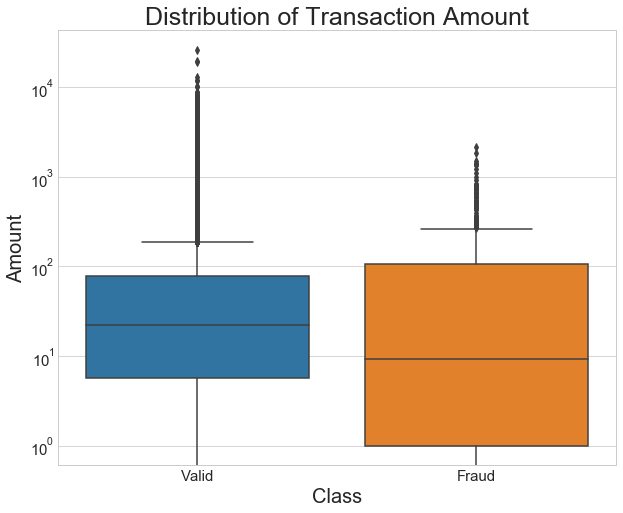

In [7]:
# Analysis of fraud by the total amount spent
plt.figure()
plt.yscale('log')
sns.set_context({"figure.figsize": (10, 8)})
g = sns.boxplot(data = cc_fraud, x = 'Class', y = 'Amount')
plt.title("Distribution of Transaction Amount", fontsize=25)
plt.xlabel('Class', fontsize=20); plt.xticks(fontsize=15)
plt.ylabel('Amount', fontsize=20); plt.yticks(fontsize=15)

(array([ -250.,     0.,   250.,   500.,   750.,  1000.,  1250.,  1500.,
         1750.,  2000.,  2250.]), <a list of 11 Text yticklabel objects>)

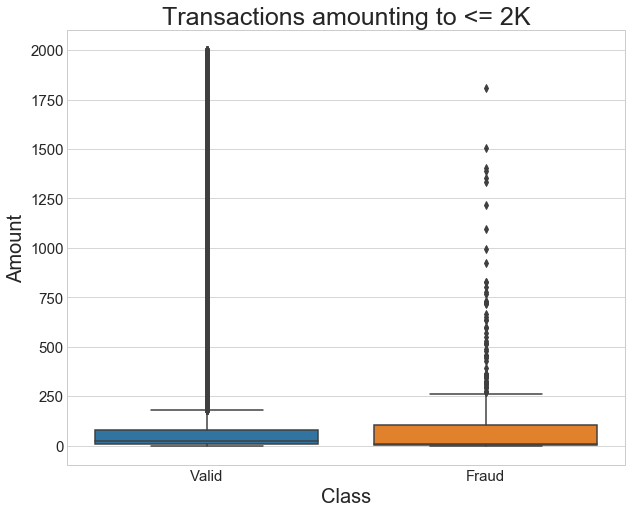

In [8]:
# Transactions less than 2K
plt.figure()
sns.set_context({"figure.figsize": (10, 8)})
g = sns.boxplot(data=cc_fraud.loc[cc_fraud.Amount <= 2000,:], x = 'Class', y = 'Amount')
plt.title("Transactions amounting to <= 2K", fontsize=25)
plt.xlabel('Class', fontsize=20); plt.xticks(fontsize=15)
plt.ylabel('Amount', fontsize=20); plt.yticks(fontsize=15)

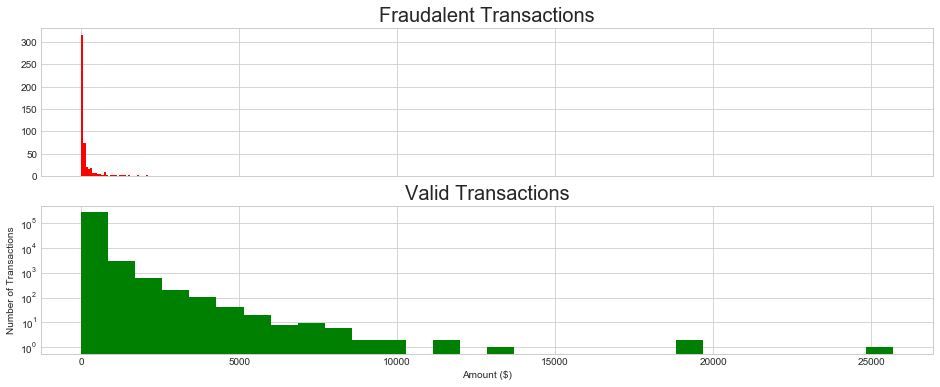

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))


ax1.hist(cc_fraud.Amount[cc_fraud.Class == 'Fraud'], bins = 30, color='red')
ax1.set_title('Fraudalent Transactions', fontsize=20)

ax2.hist(cc_fraud.Amount[cc_fraud.Class == 'Valid'], bins = 30, color='green')
ax2.set_title('Valid Transactions', fontsize=20)

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [10]:
cc_fraud.loc[cc_fraud.Amount==0,:].Class.value_counts()*100/cc_fraud.shape[0]

Valid    0.631305
Fraud    0.009480
Name: Class, dtype: float64

Of the all the transactions, 0.63% of the transactions with no transaction amount are valid whereas 0.009% of the transactions with no transaction amount are fraudelent. Is it possible to have fraudelent transactions with no transaction amount? You may argue that a thief would actually do his work! So in that sense, the row entries could be data entry errors. However, this is possible in the real world that a transaction may amount to 0.

In [11]:
def convert_time(sec):
    return datetime.datetime.fromtimestamp(sec)

cc_fraud_time = cc_fraud[['Time','Amount','Class']].copy()
cc_fraud_time['time'] = cc_fraud_time.Time.apply(convert_time)
timeDelta = datetime.datetime.utcnow() - datetime.datetime.now() 
cc_fraud_time['hour'] = cc_fraud_time.time + timeDelta
cc_fraud_time['hour'] = cc_fraud_time.hour.dt.hour
cc_fraud_time_grouped = cc_fraud_time.groupby(['hour','Class'])

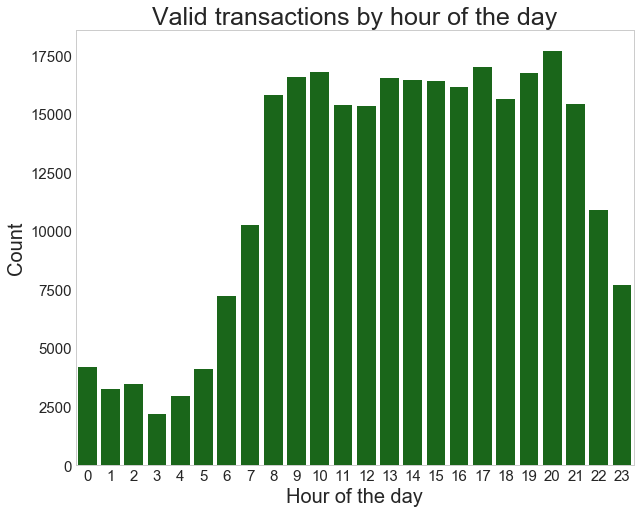

In [12]:
plt.figure()
sns.set_context({"figure.figsize": (10, 8)})
g = sns.countplot(data = cc_fraud_time[cc_fraud_time.Class == 'Valid'], x = 'hour', color = 'green',
                 saturation = 0.6)
plt.title("Valid transactions by hour of the day", fontsize=25)
plt.xlabel('Hour of the day', fontsize=20);plt.xticks(fontsize=15)
plt.ylabel('Count', fontsize=20);plt.yticks(fontsize=15)
g.axes.grid('off')

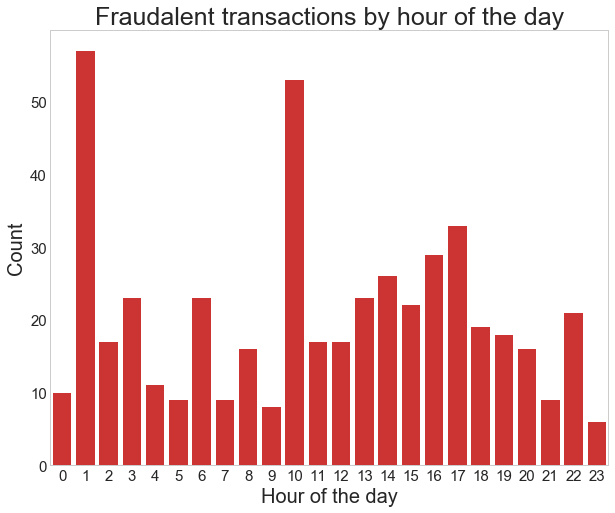

In [13]:
plt.figure()
sns.set_context({"figure.figsize": (10, 8)})
g = sns.countplot(data = cc_fraud_time[cc_fraud_time.Class == 'Fraud'], x = 'hour', color = 'red',
                 saturation = 0.6)
plt.title("Fraudalent transactions by hour of the day", fontsize=25)
plt.xlabel('Hour of the day',fontsize=20);plt.xticks(fontsize=15)
plt.ylabel('Count', fontsize=20);plt.yticks(fontsize=15)
plt.ylabel('Count')
g.axes.grid('off')

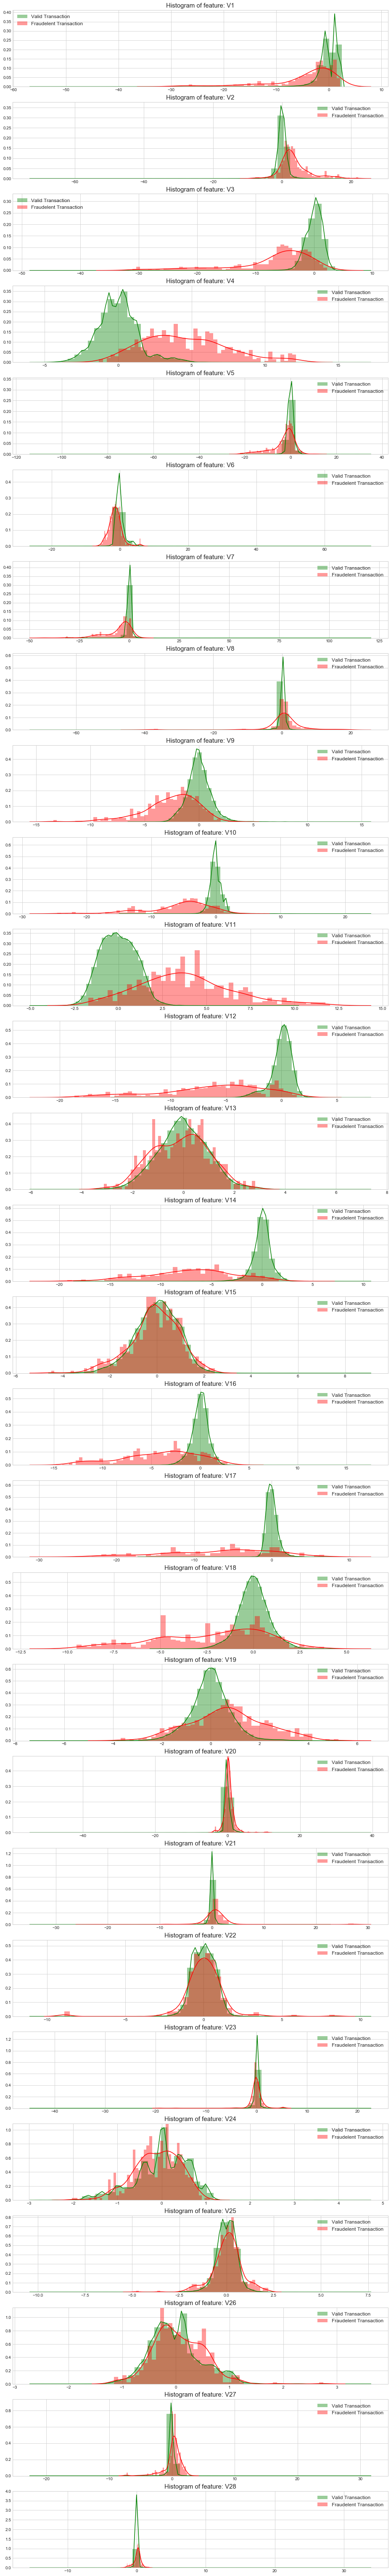

In [16]:
# Reference - https://www.kaggle.com/currie32/d/dalpozz/creditcardfraud/predicting-fraud-with-tensorflow
plt.clf()
pca_features = cc_fraud.columns[1:29]
plt.figure(figsize=(16,28*4))
gs = gridspec.GridSpec(28, 1)
for i, col in enumerate(cc_fraud[pca_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(cc_fraud[col][cc_fraud.Class == 'Valid'], bins=50, label='Valid Transaction', color='green')
    sns.distplot(cc_fraud[col][cc_fraud.Class == 'Fraud'], bins=50, label='Fraudelent Transaction', color='red')
    ax.set_xlabel('')
    ax.set_title('Histogram of feature: ' + str(col),fontsize=15)
    plt.legend(loc='best',fontsize=12)
plt.show()